In [96]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import movie_reviews
from tqdm import tqdm
tqdm.pandas()





In [107]:
filt = pd.read_csv("analysed cc - first pass.csv")

In [124]:
tog = filt[['classifiedhappy','classifiedlearning']]
togdf = pd.Series(Counter([f"{i[0]}" + " " + f"{i[1]}" for i in tog.values])).to_frame().reset_index()
togdf['r'] = togdf['index'].apply(lambda x: [int(i) for i in x.split(" ")])

In [136]:
x = [i[0] for i in togdf['r'].values]
y = [i[1] for i in togdf['r'].values]
s = [i for i in togdf[0]]

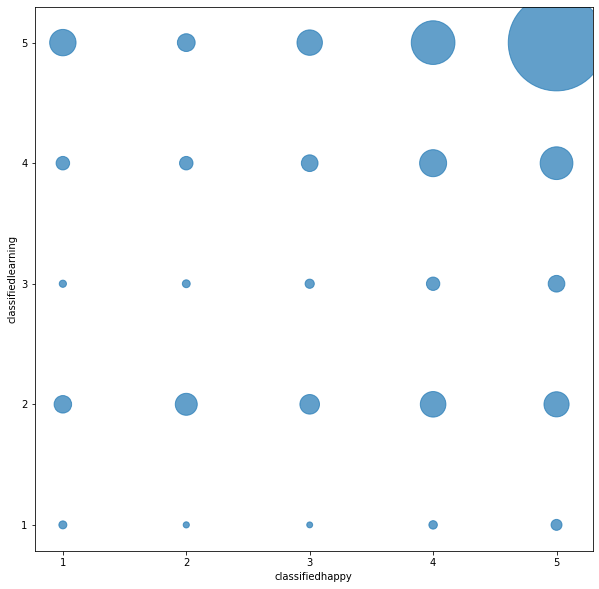

In [142]:
plt.figure(figsize = (10,10))
plt.xlabel("classifiedhappy")
plt.ylabel("classifiedlearning")
plt.scatter(x,y,alpha = 0.7,s = s)

In [143]:
togdf

index     0       r
0    5 5  9318  [5, 5]
1    1 1    64  [1, 1]
2    4 2   654  [4, 2]
3    4 5  1909  [4, 5]
4    2 4   182  [2, 4]
5    5 4  1072  [5, 4]
6    3 2   384  [3, 2]
7    4 4   730  [4, 4]
8    5 3   278  [5, 3]
9    3 4   279  [3, 4]
10   1 2   307  [1, 2]
11   2 2   483  [2, 2]
12   3 3    85  [3, 3]
13   5 2   632  [5, 2]
14   4 1    72  [4, 1]
15   2 5   316  [2, 5]
16   1 5   697  [1, 5]
17   3 5   647  [3, 5]
18   1 4   183  [1, 4]
19   2 1    38  [2, 1]
20   5 1   120  [5, 1]
21   1 3    52  [1, 3]
22   4 3   179  [4, 3]
23   2 3    62  [2, 3]
24   3 1    35  [3, 1]

In [160]:
def gettopcrn(one,two,howmany = 3):
    t = pd.Series(Counter(filt[(filt['classifiedhappy'] == one)&(filt['classifiedlearning'] == two)]['Course Key'].values)).sort_values(ascending = False).head(howmany)
    return t.to_dict()

In [164]:
gettopcrn(5,2,5)

{'201710-10703': 12,
 '201810-11327': 12,
 '201910-10144': 9,
 '201910-10765': 9,
 '201310-17684': 9}

In [168]:
filt[filt['Course Key'] == '201710-XJ']

Empty DataFrame
Columns: [Unnamed: 0, Course Key, Comments, tweet, classifiedhappy, classifiedlearning]
Index: []

In [166]:
for crn in ['201710-XJ', '201720-23948',' 201810-XJ', '201820-23948', '201910-XJ', '201920-23948']:
    print(filt[filt['Course Key'] == crn][['classifiedhappy','classifiedlearning']])

Empty DataFrame
Columns: [classifiedhappy, classifiedlearning]
Index: []
Empty DataFrame
Columns: [classifiedhappy, classifiedlearning]
Index: []
Empty DataFrame
Columns: [classifiedhappy, classifiedlearning]
Index: []
Empty DataFrame
Columns: [classifiedhappy, classifiedlearning]
Index: []
Empty DataFrame
Columns: [classifiedhappy, classifiedlearning]
Index: []
Empty DataFrame
Columns: [classifiedhappy, classifiedlearning]
Index: []


In [207]:
tocsvsomehow = [filt[filt['Course Key'] == crn][['classifiedhappy','classifiedlearning']] for crn in ["201720-XY", "201820-XW", "201920-XW", "201620-XM", "201620-XN", "201720-XY"]]

In [208]:
for i in range(len(tocsvsomehow)):
    tocsvsomehow[i].reset_index(inplace=True)
    tocsvsomehow[i]['newindx'] = [str(j) + " CSV " + f"{i}" for j in list(tocsvsomehow[i]['index'])]
    tocsvsomehow[i].set_index( 'newindx',inplace = True)
    tocsvsomehow[i].drop('index',inplace = True,axis = 1)

In [206]:
pd.concat(tocsvsomehow,sort = False).to_csv("test.csv")